In [3]:
import numpy as np
import pandas as pd 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import top_k_accuracy_score
from torchmetrics.functional import auroc
import torch
from torchmetrics import Accuracy, F1Score, Precision, Recall, CohenKappa
from utils.teachers_dict import teachers_dict
from Data.DataClass import *

def highlight_top_1(s, props=""):
    max_value = s.max()
    is_max = s == max_value
    return [props if v else '' for v in is_max]

def highlight_top_2(s, props=""):
    max_values = s.nlargest(2)
    is_max = s.isin(max_values)
    return [props if v else '' for v in is_max]


column_name = ["Method", "Model", "CIFAR10", "FMNIST", "MNIST", "STL10", "SVHN", "QMNIST", "KMNIST"]
datsets = ["CIFAR10", "FMNIST", "MNIST", "STL10", "SVHN", "QMNIST", "KMNIST"]

students = ["resnet18" , "squeezenet" , "densenet", "googlenet", "shufflenet", "mobilenet", "resnext50_32x4d", "wide_resnet50_2", "mnasnet"]
rows_list = []

for model in students[:1]:
    for task in datsets:
        data = pd.read_csv('./output_student/' + model + '_student_'+ task +'_finetuning_/predictions.csv')
        l = []
        num_classes = 10
        for i in range(num_classes):
            l.append(data['class_'+ str(i)])
        preds = torch.tensor(np.stack(l).transpose())
        targets = torch.tensor(np.array(data['target']))
        acc = Accuracy(task="multiclass", num_classes=num_classes)
        rows_list.append({'Teacher' : "Multi-teacher",'Task' : task, 'ACC' : acc(preds, targets).item()*100})


teacher_model = ["squeezenet" , "densenet", "googlenet", "shufflenet", "mobilenet", "resnext50_32x4d", "wide_resnet50_2", "mnasnet"]
for teacher in teacher_model:
    for task in datsets:
        data = pd.read_csv('./output_student/' + "distill-one-"+teacher+"-to-resnet18_" + task + '_finetuning/predictions.csv')
        l = []
        num_classes = 10
        for i in range(num_classes):
            l.append(data['class_'+ str(i)])
        preds = torch.tensor(np.stack(l).transpose())
        targets = torch.tensor(np.array(data['target']))
        acc = Accuracy(task="multiclass", num_classes=num_classes)
        rows_list.append({'Teacher' : teacher,'Task' : task, 'ACC' : acc(preds, targets).item()*100})

df_merged = pd.DataFrame(rows_list)   

/tmp/ipykernel_1784786/906555446.py:5: UserWarning: The palette list has more values (20) than needed (9), which may not be intended.
  ax = sns.barplot(x='Task', y="ACC", data=df_merged, hue = "Teacher", estimator="median", errorbar=None, fill=True, alpha=.7, palette=cmap)


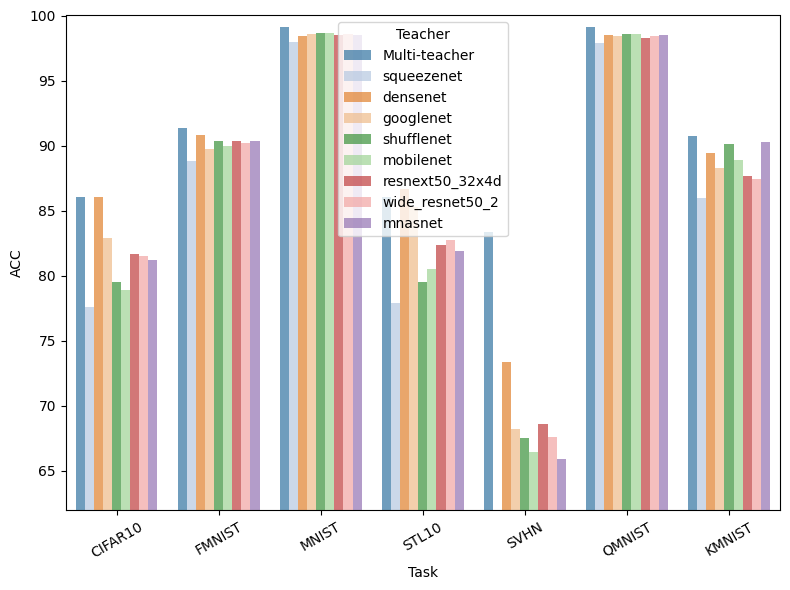

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 6))
cmap = sns.color_palette("tab20")
ax = sns.barplot(x='Task', y="ACC", data=df_merged, hue = "Teacher", estimator="median", errorbar=None, fill=True, alpha=.7, palette=cmap)
plt.xticks(rotation=30)
plt.ylim(62,100)
plt.tight_layout()
fig.savefig('Fig1.png', dpi=fig.dpi)

In [10]:
rows_list = []
for model in students[:1]:
    for task in datsets:
        data = pd.read_csv('./output_student/' + model + '_student_'+ task +'_finetuning_/predictions.csv')
        l = []
        num_classes = 10
        for i in range(num_classes):
            l.append(data['class_'+ str(i)])
        preds = torch.tensor(np.stack(l).transpose())
        targets = torch.tensor(np.array(data['target']))
        acc = Accuracy(task="multiclass", num_classes=num_classes)
        rows_list.append({'Teacher' : "Multi-teacher",'Task' : task, 'ACC' : acc(preds, targets).item()*100})
teacher_model = ["squeezenet" , "densenet", "googlenet", "shufflenet", "mobilenet", "resnext50_32x4d", "wide_resnet50_2", "mnasnet"]
for task in datsets:
    highest = 0
    lowest = 100
    for teacher in teacher_model:
        data = pd.read_csv('./output_student/' + "distill-one-"+teacher+"-to-resnet18_" + task + '_finetuning/predictions.csv')
        l = []
        num_classes = 10
        for i in range(num_classes):
            l.append(data['class_'+ str(i)])
        preds = torch.tensor(np.stack(l).transpose())
        targets = torch.tensor(np.array(data['target']))
        acc = Accuracy(task="multiclass", num_classes=num_classes)
        acc = acc(preds, targets).item()*100
        if acc < lowest:
            lowest = acc
        if acc > highest:
            highest = acc
    rows_list.append({'Teacher' : "Highest",'Task' : task, 'ACC' : highest})
    rows_list.append({'Teacher' : "Lowest",'Task' : task, 'ACC' : lowest})



/tmp/ipykernel_1784786/676166904.py:6: UserWarning: The palette list has more values (20) than needed (3), which may not be intended.
  ax = sns.barplot(x='Task', y="ACC", data=df_merged, hue = "Teacher", estimator="median", errorbar=None, fill=True, alpha=.7, palette=cmap)


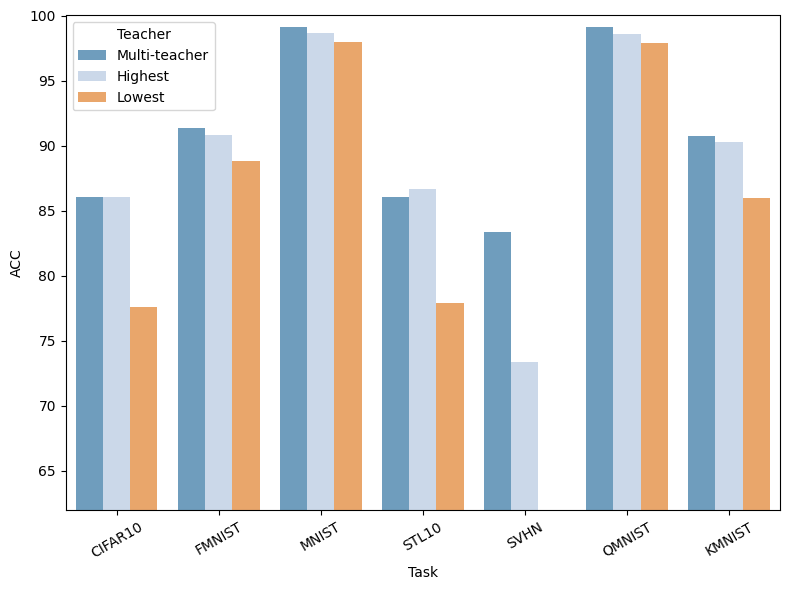

In [11]:
df_merged = pd.DataFrame(rows_list)   
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 6))
cmap = sns.color_palette("tab20")
ax = sns.barplot(x='Task', y="ACC", data=df_merged, hue = "Teacher", estimator="median", errorbar=None, fill=True, alpha=.7, palette=cmap)
plt.xticks(rotation=30)
plt.ylim(62,100)
plt.tight_layout()

In [12]:
rows_list = []
for model in students[:1]:
    results = ["Multi-teacher", ]
    for task in datsets:
        data = pd.read_csv('./output_student/' + model + '_student_'+ task +'_finetuning_/predictions.csv')
        l = []
        num_classes = 10
        for i in range(num_classes):
            l.append(data['class_'+ str(i)])
        preds = torch.tensor(np.stack(l).transpose())
        targets = torch.tensor(np.array(data['target']))
        acc = Accuracy(task="multiclass", num_classes=num_classes)
        results.append(acc(preds, targets).item()*100)
    rows_list.append(results)
teacher_model = ["squeezenet" , "densenet", "googlenet", "shufflenet", "mobilenet", "resnext50_32x4d", "wide_resnet50_2", "mnasnet"]
for teacher in teacher_model:
    results = [teacher, ]
    for task in datsets:
        data = pd.read_csv('./output_student/' + "distill-one-"+teacher+"-to-resnet18_" + task + '_finetuning/predictions.csv')
        l = []
        num_classes = 10
        for i in range(num_classes):
            l.append(data['class_'+ str(i)])
        preds = torch.tensor(np.stack(l).transpose())
        targets = torch.tensor(np.array(data['target']))
        acc = Accuracy(task="multiclass", num_classes=num_classes)
        results.append(acc(preds, targets).item()*100)
    rows_list.append(results)

In [18]:
df = pd.DataFrame(rows_list, columns = ['Teacher', 'CIFAR10', 'FMNIST', 'MNIST', 'STL10', 'SVHN', 'QMNIST', 'KMNIST'])
for col in ['CIFAR10', 'FMNIST', 'MNIST', 'STL10', 'SVHN', 'QMNIST', 'KMNIST']:
    df[col] = df[col].rank(method = "dense", ascending=False)
df

,Teacher,CIFAR10,FMNIST,MNIST,STL10,SVHN,QMNIST,KMNIST
0,Multi-teacher,1.0,1.0,1.0,2.0,1.0,1.0,1.0
1,squeezenet,8.0,9.0,8.0,9.0,9.0,9.0,9.0
2,densenet,1.0,2.0,7.0,1.0,2.0,5.0,4.0
3,googlenet,2.0,8.0,4.0,3.0,4.0,6.0,6.0
4,shufflenet,6.0,4.0,2.0,8.0,6.0,2.0,3.0
5,mobilenet,7.0,7.0,2.0,7.0,7.0,3.0,5.0
6,resnext50_32x4d,3.0,3.0,6.0,5.0,3.0,8.0,7.0
7,wide_resnet50_2,4.0,6.0,3.0,4.0,5.0,7.0,8.0
8,mnasnet,5.0,5.0,5.0,6.0,8.0,4.0,2.0


In [22]:
df = df.set_index('Teacher')
df

,CIFAR10,FMNIST,MNIST,STL10,SVHN,QMNIST,KMNIST
Teacher,,,,,,,
Multi-teacher,1.0,1.0,1.0,2.0,1.0,1.0,1.0
squeezenet,8.0,9.0,8.0,9.0,9.0,9.0,9.0
densenet,1.0,2.0,7.0,1.0,2.0,5.0,4.0
googlenet,2.0,8.0,4.0,3.0,4.0,6.0,6.0
shufflenet,6.0,4.0,2.0,8.0,6.0,2.0,3.0
mobilenet,7.0,7.0,2.0,7.0,7.0,3.0,5.0
resnext50_32x4d,3.0,3.0,6.0,5.0,3.0,8.0,7.0
wide_resnet50_2,4.0,6.0,3.0,4.0,5.0,7.0,8.0
mnasnet,5.0,5.0,5.0,6.0,8.0,4.0,2.0


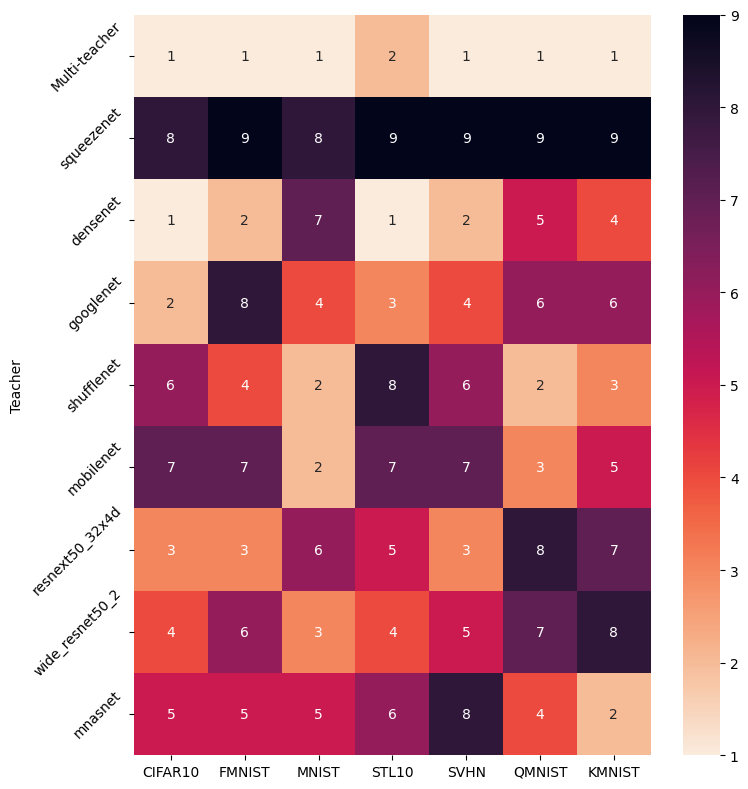

In [29]:
fig = plt.figure(figsize=(8, 8))
cmap = sns.cm.rocket_r
ax = sns.heatmap(df, annot=True, cmap = cmap)
plt.yticks(rotation=45)
plt.tight_layout()
fig.savefig('Fig1.png', dpi=fig.dpi)

In [32]:
import numpy as np
import pandas as pd 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import top_k_accuracy_score
from torchmetrics.functional import auroc
import torch
from torchmetrics import Accuracy, F1Score, Precision, Recall, CohenKappa
from utils.teachers_dict import teachers_dict
from Data.DataClass import *

def highlight_top_1(s, props=""):
    max_value = s.max()
    is_max = s == max_value
    return [props if v else '' for v in is_max]

def highlight_top_2(s, props=""):
    max_values = s.nlargest(2)
    is_max = s.isin(max_values)
    return [props if v else '' for v in is_max]


column_name = ["Method", "Model", "CIFAR10", "FMNIST", "MNIST", "STL10", "SVHN", "QMNIST", "KMNIST"]
datsets = ["CIFAR10", "FMNIST", "MNIST", "STL10", "SVHN", "QMNIST", "KMNIST"]
results_student = []
results_student_c = []
results_student_MSE = []
results_teacher = []

students = ["resnet18" , "squeezenet" , "densenet", "googlenet", "shufflenet", "mobilenet", "resnext50_32x4d", "wide_resnet50_2", "mnasnet"]
rows_list = []

for model in students:
    r = []
    for task in datsets:
        data = pd.read_csv('./output_student/' + model + '_student_'+ task +'_finetuning_/predictions.csv')
        l = []
        num_classes = 10
        for i in range(num_classes):
            l.append(data['class_'+ str(i)])
        preds = torch.tensor(np.stack(l).transpose())
        targets = torch.tensor(np.array(data['target']))
        acc = Accuracy(task="multiclass", num_classes=num_classes)
        r.append(acc(preds, targets).item()*100)
    rows_list.append({'Method' : "NLL",'Model' : model, "Task": task, 'ACC' : np.mean(r)})

for model in ["resnet18" , "squeezenet" , "googlenet", "shufflenet", "mnasnet"]:
    r = []
    for task in datsets:
        data = pd.read_csv('./output_student/' + model + '_student_'+ task +'_finetuning_Cosine/predictions.csv')
        l = []
        num_classes = 10
        for i in range(num_classes):
            l.append(data['class_'+ str(i)])
        preds = torch.tensor(np.stack(l).transpose())
        targets = torch.tensor(np.array(data['target']))
        acc = Accuracy(task="multiclass", num_classes=num_classes)
        r.append(acc(preds, targets).item()*100)
    rows_list.append({'Method' : "Cosine",'Model' : model, "Task": task, 'ACC' : np.mean(r)})

students_df_c = pd.DataFrame(results_student_c, columns = np.array(column_name).flatten())

for model in ["resnet18" , "squeezenet" , "googlenet", "shufflenet", "mobilenet"]:np.mean(r)
    r = []
    for task in datsets:
        data = pd.read_csv('./output_student/' + model + '_student_'+ task +'_finetuning_MSE/predictions.csv')
        l = []
        num_classes = 10
        for i in range(num_classes):
            l.append(data['class_'+ str(i)])
        preds = torch.tensor(np.stack(l).transpose())
        targets = torch.tensor(np.array(data['target']))
        acc = Accuracy(task="multiclass", num_classes=num_classes)
        r.append(acc(preds, targets).item()*100)
    rows_list.append({'Method' : "L2",'Model' : model, "Task": task, 'ACC' : np.mean(r)})

students_df_MSE = pd.DataFrame(results_student_MSE, columns = np.array(column_name).flatten())

for model in students:
    r = []
    for task in datsets:
        data = pd.read_csv('./output_teacher/' + model + '_'+ task +'_teacher_finetuning/predictions.csv')
        l = []
        num_classes = 10
        for i in range(num_classes):
            l.append(data['class_'+ str(i)])
        preds = torch.tensor(np.stack(l).transpose())
        targets = torch.tensor(np.array(data['target']))
        acc = Accuracy(task="multiclass", num_classes=num_classes)
        r.append(acc(preds, targets).item()*100)
    rows_list.append({'Method' : "No KD",'Model' : model, "Task": task, 'ACC' : np.mean(r)})

df_merged = pd.DataFrame(rows_list)    

<Figure size 800x600 with 0 Axes>

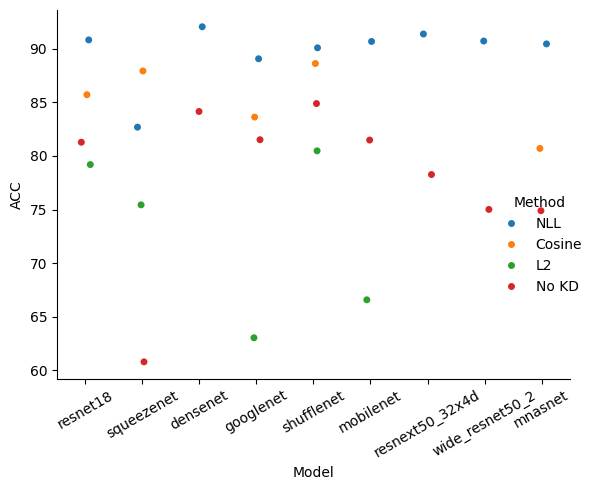

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,9)
cmap = sns.color_palette("husl", 4, desat=0.5)
ax = sns.catplot(x="Model", y="ACC", data=df_merged, hue = "Method", estimator="median")
plt.xticks(rotation=30)
plt.tight_layout()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,9)
cmap = sns.color_palette("husl", 4, desat=0.5)
ax = sns.catplot(x="Model", y="ACC", data=df_merged, hue = "Method", estimator="median")
plt.xticks(rotation=30)
plt.tight_layout()

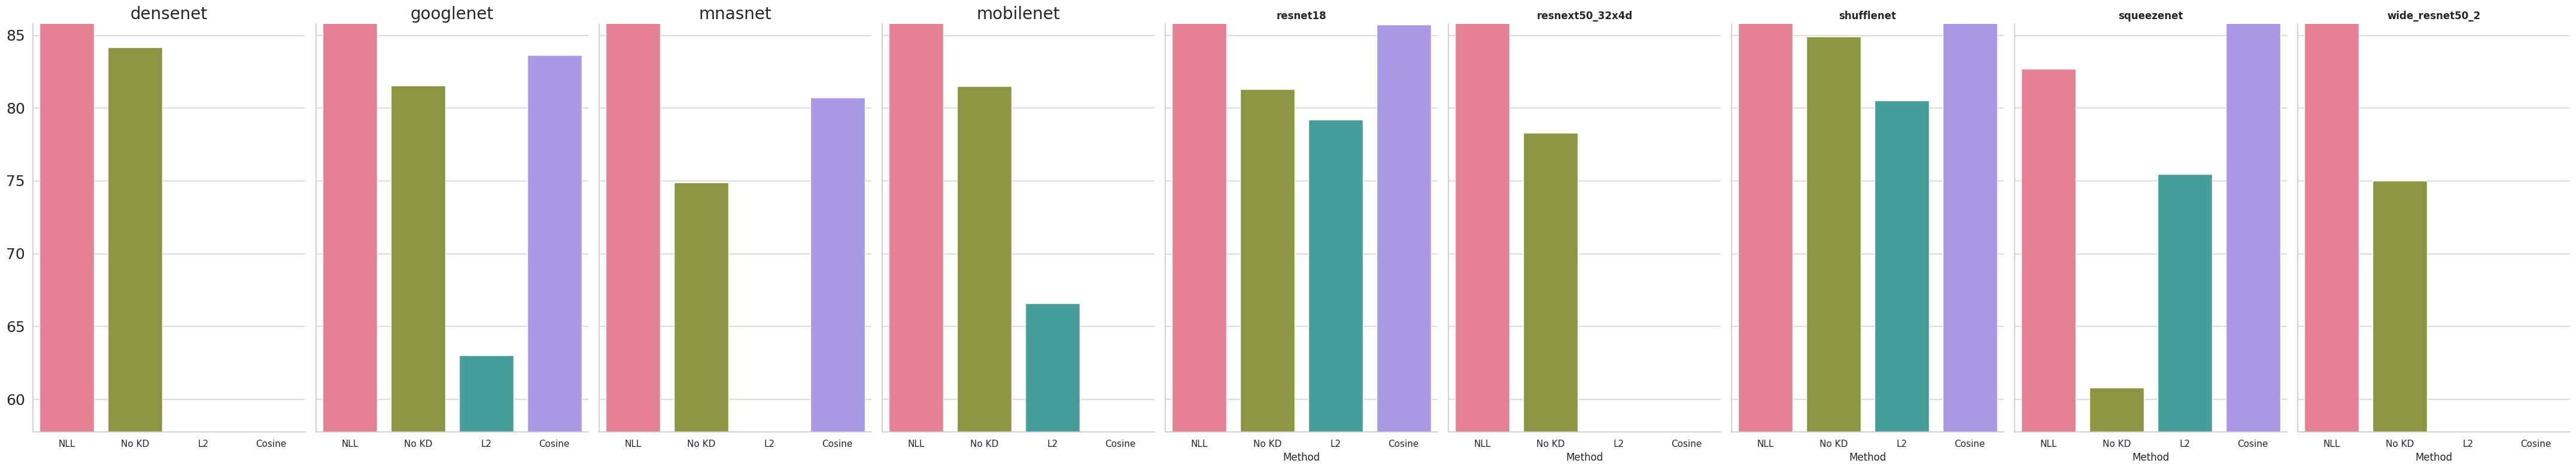

In [41]:
sns.set(style='whitegrid')

colors = ["#090364", "#4374B3"]
sns.set_palette(sns.color_palette(colors))
df = df_merged.sort_values('Model')
df['Strategy'] = df['Method'].apply(lambda x: 0 if "NLL" in x else 1)
g = sns.catplot(x='Method', y='ACC', data=df, col='Model', kind='bar', hue='Method', legend=False, height=8, aspect=0.6, palette="husl", sharey=True)

g.set_titles(template='{col_name}', fontweight='bold')
# title template

axes = g.axes.flatten()

for k, (name, group) in enumerate(df.groupby('Method')):
    mmin, mmax = group['ACC'].min(), group['ACC'].max()
    
    axes[k].set_ylim(mmin - 0.05 *mmin, mmax + 0.01 * mmax)
        
    # make y labels bigger
    for item in axes[k].get_yticklabels():
        item.set_fontsize(18)
        
    # remove x label
    axes[k].set_xlabel('')
    # remove y label
    axes[k].set_ylabel('')
        
        
    
    # make title bigger
    axes[k].set_title(axes[k].get_title(), fontsize=20)




# export save
g.fig.tight_layout()

plt.savefig("img_test.png", dpi=300)


In [48]:
df_ = df[["Method", "Model", "ACC"]]
df_tmp = df_.set_index(["Model", "Task"])

df_tmp["delta acc"] = (df_tmp.ACC - df_tmp[df_tmp.Method == "No KD"].ACC)

,Method,Model,Task,ACC,Strategy
2,NLL,densenet,KMNIST,92.073601,0
21,No KD,densenet,KMNIST,84.158341,1
22,No KD,googlenet,KMNIST,81.521892,1
3,NLL,googlenet,KMNIST,89.083122,0
16,L2,googlenet,KMNIST,63.018143,1
11,Cosine,googlenet,KMNIST,83.636080,1
13,Cosine,mnasnet,KMNIST,80.705072,1
8,NLL,mnasnet,KMNIST,90.472760,0
27,No KD,mnasnet,KMNIST,74.887691,1
18,L2,mobilenet,KMNIST,66.564556,1


In [47]:
df_tmp

Method        ACC  Strategy  delta acc
Model           Task                                          
densenet        KMNIST     NLL  92.073601         0   7.915259
                KMNIST   No KD  84.158341         1   0.000000
googlenet       KMNIST   No KD  81.521892         1   0.000000
                KMNIST     NLL  89.083122         0   7.561230
                KMNIST      L2  63.018143         1 -18.503748
                KMNIST  Cosine  83.636080         1   2.114189
mnasnet         KMNIST  Cosine  80.705072         1   5.817381
                KMNIST     NLL  90.472760         0  15.585069
                KMNIST   No KD  74.887691         1   0.000000
mobilenet       KMNIST      L2  66.564556         1 -14.923448
                KMNIST   No KD  81.488003         1   0.000000
                KMNIST     NLL  90.700020         0   9.212017
resnet18        KMNIST   No KD  81.287043         1   0.000000
                KMNIST      L2  79.199962         1  -2.087081
                KMNIST  Cosine  85.726794         1   4.439751
                KMNIST     NLL  90.843627         0   9.556584
resnext50_32x4d KMNIST     NLL  91.394661         0  13.125310
                KMNIST   No KD  78.269351         1   0.000000
shufflenet      KMNIST  Cosine  88.639726         1   3.742206
                KMNIST      L2  80.484058         1  -4.413462
                KMNIST     NLL  90.106330         0   5.208810
                KMNIST   No KD  84.897520         1   0.000000
squeezenet      KMNIST      L2  75.436133         1  14.666994
                KMNIST   No KD  60.769139         1   0.000000
                KMNIST     NLL  82.693750         0  21.924611
                KMNIST  Cosine  87.944087         1  27.174948
wide_resnet50_2 KMNIST     NLL  90.739756         0  15.729607
                KMNIST   No KD  75.010149         1   0.000000

In [116]:
rows_list = []

for model in ["resnet18" , "squeezenet" , "googlenet", "shufflenet", "mnasnet", "mobilenet"]:
    r = ["NLL"]
    for task in datsets:
        data = pd.read_csv('./output_student/' + model + '_student_'+ task +'_finetuning_/predictions.csv')
        l = []
        num_classes = 10
        for i in range(num_classes):
            l.append(data['class_'+ str(i)])
        preds = torch.tensor(np.stack(l).transpose())
        targets = torch.tensor(np.array(data['target']))
        acc = Accuracy(task="multiclass", num_classes=num_classes)
        rows_list.append({'Method' : "NLL",'Model' : model, "Task": task, 'ACC' : acc(preds, targets).item()*100})
        r.append(acc(preds, targets).item()*100)

for model in ["resnet18" , "squeezenet" , "googlenet", "shufflenet", "mnasnet", "mobilenet"]:
    r = ["Cosine"]
    for task in datsets:
        data = pd.read_csv('./output_student/' + model + '_student_'+ task +'_finetuning_Cosine/predictions.csv')
        l = []
        num_classes = 10
        for i in range(num_classes):
            l.append(data['class_'+ str(i)])
        preds = torch.tensor(np.stack(l).transpose())
        targets = torch.tensor(np.array(data['target']))
        acc = Accuracy(task="multiclass", num_classes=num_classes)
        rows_list.append({'Method' : "Cosine",'Model' : model, "Task": task, 'ACC' : acc(preds, targets).item()*100})
        r.append(acc(preds, targets).item()*100)

students_df_c = pd.DataFrame(results_student_c, columns = np.array(column_name).flatten())

for model in ["resnet18" , "squeezenet" , "googlenet", "shufflenet", "mnasnet", "mobilenet"]:
    for task in datsets:
        data = pd.read_csv('./output_student/' + model + '_student_'+ task +'_finetuning_MSE/predictions.csv')
        l = []
        num_classes = 10
        for i in range(num_classes):
            l.append(data['class_'+ str(i)])
        preds = torch.tensor(np.stack(l).transpose())
        targets = torch.tensor(np.array(data['target']))
        acc = Accuracy(task="multiclass", num_classes=num_classes)
        rows_list.append({'Method' : "L2",'Model' : model, "Task": task, 'ACC' : acc(preds, targets).item()*100})

students_df_MSE = pd.DataFrame(results_student_MSE, columns = np.array(column_name).flatten())

for model in["resnet18" , "squeezenet" , "googlenet", "shufflenet", "mnasnet", "mobilenet"]:
    for task in datsets:
        data = pd.read_csv('./output_teacher/' + model + '_'+ task +'_teacher_finetuning/predictions.csv')
        l = []
        num_classes = 10
        for i in range(num_classes):
            l.append(data['class_'+ str(i)])
        preds = torch.tensor(np.stack(l).transpose())
        targets = torch.tensor(np.array(data['target']))
        acc = Accuracy(task="multiclass", num_classes=num_classes)
        rows_list.append({'Method' : "No KD",'Model' : model, "Task": task, 'ACC' : acc(preds, targets).item()*100})

df_merged = pd.DataFrame(rows_list)    
df_merged

FileNotFoundError: [Errno 2] No such file or directory: './output_student/densenet_student_MNIST_finetuning_Cosine/predictions.csv'

In [117]:
No_KD_df = df_merged[df_merged.Method == "No KD"]
No_KD_df

,Method,Model,Task,ACC
126,No KD,resnet18,CIFAR10,78.009999
127,No KD,resnet18,FMNIST,87.019998
128,No KD,resnet18,MNIST,96.710002
129,No KD,resnet18,STL10,92.262501
130,No KD,resnet18,SVHN,38.433465
131,No KD,resnet18,QMNIST,96.603334
132,No KD,resnet18,KMNIST,79.970002
133,No KD,squeezenet,CIFAR10,52.960002
134,No KD,squeezenet,FMNIST,66.469997
135,No KD,squeezenet,MNIST,69.370002


In [118]:
NLL_KD_df = df_merged[df_merged.Method == "NLL"]
NLL_KD_df

,Method,Model,Task,ACC
0,NLL,resnet18,CIFAR10,86.089998
1,NLL,resnet18,FMNIST,91.380000
2,NLL,resnet18,MNIST,99.150002
3,NLL,resnet18,STL10,86.049998
4,NLL,resnet18,SVHN,83.332056
5,NLL,resnet18,QMNIST,99.153334
6,NLL,resnet18,KMNIST,90.750003
7,NLL,squeezenet,CIFAR10,70.740002
8,NLL,squeezenet,FMNIST,83.590001
9,NLL,squeezenet,MNIST,99.210000


In [119]:
L2_KD_df = df_merged[df_merged.Method == "L2"]
L2_KD_df

,Method,Model,Task,ACC
84,L2,resnet18,CIFAR10,81.699997
85,L2,resnet18,FMNIST,85.100001
86,L2,resnet18,MNIST,96.880001
87,L2,resnet18,STL10,74.312502
88,L2,resnet18,SVHN,40.062231
89,L2,resnet18,QMNIST,96.595001
90,L2,resnet18,KMNIST,79.750001
91,L2,squeezenet,CIFAR10,76.779997
92,L2,squeezenet,FMNIST,83.260000
93,L2,squeezenet,MNIST,89.420003


In [120]:
Cosine_KD_df = df_merged[df_merged.Method == "Cosine"]
Cosine_KD_df

,Method,Model,Task,ACC
42,Cosine,resnet18,CIFAR10,84.820002
43,Cosine,resnet18,FMNIST,90.009999
44,Cosine,resnet18,MNIST,98.860002
45,Cosine,resnet18,STL10,86.500001
46,Cosine,resnet18,SVHN,53.030884
47,Cosine,resnet18,QMNIST,98.746669
48,Cosine,resnet18,KMNIST,88.120002
49,Cosine,squeezenet,CIFAR10,84.160000
50,Cosine,squeezenet,FMNIST,90.829998
51,Cosine,squeezenet,MNIST,98.979998


In [121]:
No_KD_df["difACC"] = np.array(No_KD_df.ACC) - np.array(NLL_KD_df.ACC)
No_KD_df

/tmp/ipykernel_1784786/309859777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  No_KD_df["difACC"] = np.array(No_KD_df.ACC) - np.array(NLL_KD_df.ACC)


,Method,Model,Task,ACC,difACC
126,No KD,resnet18,CIFAR10,78.009999,-8.080000
127,No KD,resnet18,FMNIST,87.019998,-4.360002
128,No KD,resnet18,MNIST,96.710002,-2.440000
129,No KD,resnet18,STL10,92.262501,6.212503
130,No KD,resnet18,SVHN,38.433465,-44.898590
131,No KD,resnet18,QMNIST,96.603334,-2.550000
132,No KD,resnet18,KMNIST,79.970002,-10.780001
133,No KD,squeezenet,CIFAR10,52.960002,-17.780000
134,No KD,squeezenet,FMNIST,66.469997,-17.120004
135,No KD,squeezenet,MNIST,69.370002,-29.839998


In [122]:
L2_KD_df["difACC"] = np.array(L2_KD_df.ACC) - np.array(NLL_KD_df.ACC)
L2_KD_df

/tmp/ipykernel_1784786/4080160331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  L2_KD_df["difACC"] = np.array(L2_KD_df.ACC) - np.array(NLL_KD_df.ACC)


,Method,Model,Task,ACC,difACC
84,L2,resnet18,CIFAR10,81.699997,-4.390001
85,L2,resnet18,FMNIST,85.100001,-6.279999
86,L2,resnet18,MNIST,96.880001,-2.270001
87,L2,resnet18,STL10,74.312502,-11.737496
88,L2,resnet18,SVHN,40.062231,-43.269825
89,L2,resnet18,QMNIST,96.595001,-2.558333
90,L2,resnet18,KMNIST,79.750001,-11.000001
91,L2,squeezenet,CIFAR10,76.779997,6.039995
92,L2,squeezenet,FMNIST,83.260000,-0.330001
93,L2,squeezenet,MNIST,89.420003,-9.789997


In [123]:
Cosine_KD_df["difACC"] = np.array(Cosine_KD_df.ACC) - np.array(NLL_KD_df.ACC)
Cosine_KD_df

/tmp/ipykernel_1784786/79718431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cosine_KD_df["difACC"] = np.array(Cosine_KD_df.ACC) - np.array(NLL_KD_df.ACC)


,Method,Model,Task,ACC,difACC
42,Cosine,resnet18,CIFAR10,84.820002,-1.269996
43,Cosine,resnet18,FMNIST,90.009999,-1.370001
44,Cosine,resnet18,MNIST,98.860002,-0.290000
45,Cosine,resnet18,STL10,86.500001,0.450003
46,Cosine,resnet18,SVHN,53.030884,-30.301172
47,Cosine,resnet18,QMNIST,98.746669,-0.406665
48,Cosine,resnet18,KMNIST,88.120002,-2.630001
49,Cosine,squeezenet,CIFAR10,84.160000,13.419998
50,Cosine,squeezenet,FMNIST,90.829998,7.239997
51,Cosine,squeezenet,MNIST,98.979998,-0.230002


In [124]:
df_tmp = pd.concat([No_KD_df, Cosine_KD_df, L2_KD_df],ignore_index=True)
df_tmp

,Method,Model,Task,ACC,difACC
0,No KD,resnet18,CIFAR10,78.009999,-8.080000
1,No KD,resnet18,FMNIST,87.019998,-4.360002
2,No KD,resnet18,MNIST,96.710002,-2.440000
3,No KD,resnet18,STL10,92.262501,6.212503
4,No KD,resnet18,SVHN,38.433465,-44.898590
...,...,...,...,...,...
121,L2,mobilenet,MNIST,79.280001,-19.730002
122,L2,mobilenet,STL10,34.237501,-52.250001
123,L2,mobilenet,SVHN,39.662722,-39.754918
124,L2,mobilenet,QMNIST,88.731664,-10.283333


/export/livia/home/vision/Bkarimian/miniconda3/envs/env/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/export/livia/home/vision/Bkarimian/miniconda3/envs/env/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 23.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


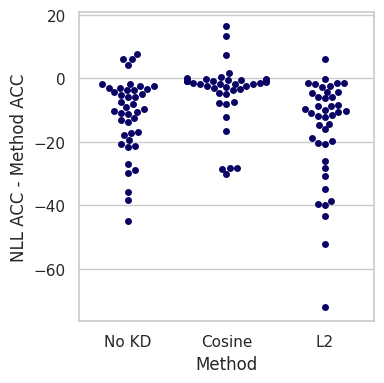

In [125]:
fig = plt.figure(figsize=(4, 4))
ax = sns.swarmplot(data=df_tmp, x="Method", y="difACC")
plt.ylabel("NLL ACC - Method ACC")
plt.xlabel("Method")
plt.tight_layout()
fig.savefig('Fig3.png', dpi=fig.dpi)

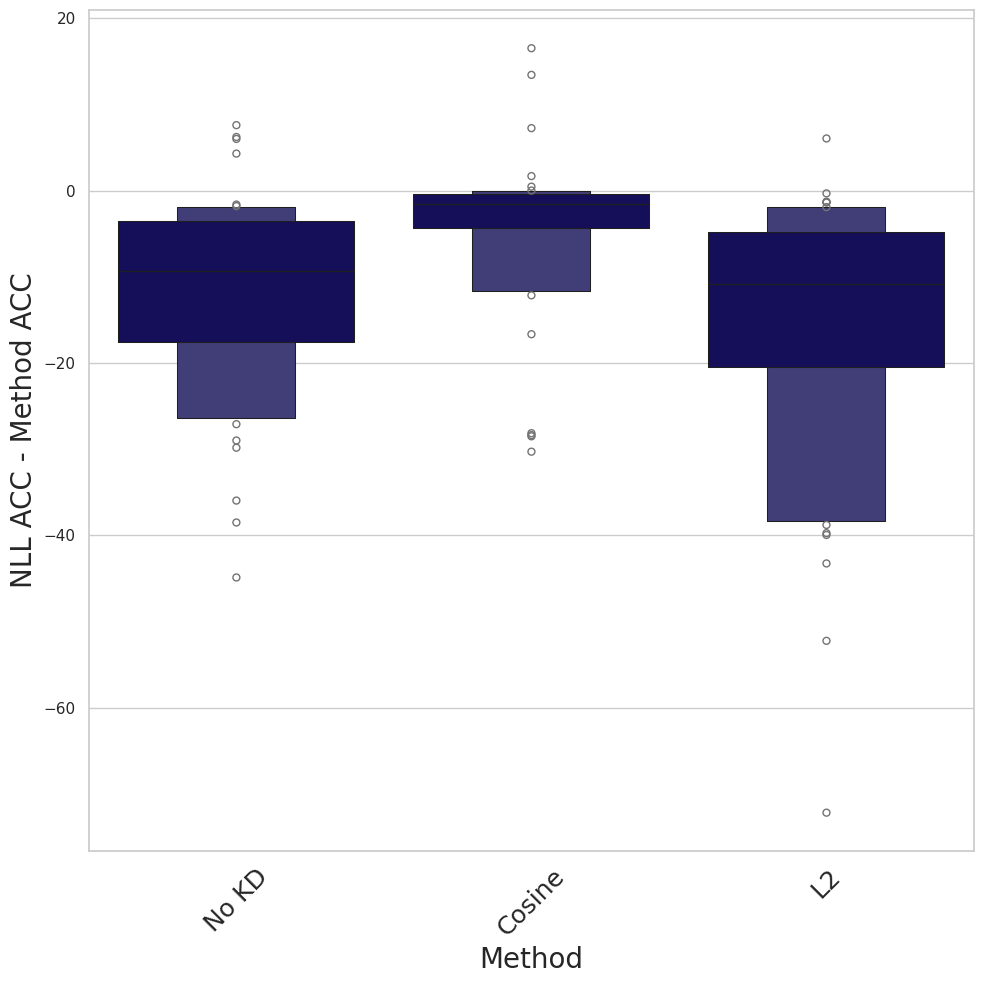

In [172]:
fig = plt.figure(figsize=(10, 10)) 
ax = sns.boxenplot(data=df_tmp, x="Method", y="difACC") # Set label sizes and rotate the x labels 
plt.ylabel("NLL ACC - Method ACC", fontsize=20) 
plt.xlabel("Method", fontsize=20) 
plt.xticks(rotation=45, fontsize=18) # Rotate x-axis labels by 45 degrees 
plt.tight_layout()
fig.savefig('Fig3.png', dpi=fig.dpi)

In [133]:
DATA_PATH = "vision_fig1.csv"

df = pd.read_csv(DATA_PATH)
df

,Teacher,Task,ACC
0,Multi-teacher,CIFAR10,86.089998
1,Multi-teacher,FMNIST,91.380000
2,Multi-teacher,MNIST,99.150002
3,Multi-teacher,STL10,86.049998
4,Multi-teacher,SVHN,83.332056
...,...,...,...
58,mnasnet,MNIST,98.519999
59,mnasnet,STL10,81.937498
60,mnasnet,SVHN,65.930396
61,mnasnet,QMNIST,98.523331


In [134]:
Multi_df = df[df.Teacher == "Multi-teacher"]
Multi_df

,Teacher,Task,ACC
0,Multi-teacher,CIFAR10,86.089998
1,Multi-teacher,FMNIST,91.380000
2,Multi-teacher,MNIST,99.150002
3,Multi-teacher,STL10,86.049998
4,Multi-teacher,SVHN,83.332056
5,Multi-teacher,QMNIST,99.153334
6,Multi-teacher,KMNIST,90.750003


In [135]:
df_ = df[df.Teacher != "Multi-teacher"]
df_

,Teacher,Task,ACC
7,squeezenet,CIFAR10,77.590001
8,squeezenet,FMNIST,88.779998
9,squeezenet,MNIST,97.979999
10,squeezenet,STL10,77.875000
11,squeezenet,SVHN,56.637985
12,squeezenet,QMNIST,97.866666
13,squeezenet,KMNIST,85.949999
14,densenet,CIFAR10,86.089998
15,densenet,FMNIST,90.799999
16,densenet,MNIST,98.460001


In [137]:
df_["diffACC"] = 0

/tmp/ipykernel_1784786/2036419745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_["diffACC"] = 0


In [140]:
df_

,Teacher,Task,ACC,diffACC
7,squeezenet,CIFAR10,77.590001,0
8,squeezenet,FMNIST,88.779998,0
9,squeezenet,MNIST,97.979999,0
10,squeezenet,STL10,77.875000,0
11,squeezenet,SVHN,56.637985,0
12,squeezenet,QMNIST,97.866666,0
13,squeezenet,KMNIST,85.949999,0
14,densenet,CIFAR10,86.089998,0
15,densenet,FMNIST,90.799999,0
16,densenet,MNIST,98.460001,0


In [150]:
df_.loc[df_.Teacher == "mnasnet","ACC"]

56    81.199998
57    90.350002
58    98.519999
59    81.937498
60    65.930396
61    98.523331
62    90.289998
Name: ACC, dtype: float64

In [151]:
for t in df_.Teacher.unique():
    df_.loc[df_.Teacher == t,"diffACC"] = np.array(df_[df_.Teacher == t].ACC) - np.array(Multi_df.ACC)

/tmp/ipykernel_1784786/2478975770.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ -8.49999785  -2.60000229  -1.17000341  -8.17499757 -26.69407129
  -1.28666759  -4.80000377]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_.loc[df_.Teacher == t,"diffACC"] = np.array(df_[df_.Teacher == t].ACC) - np.array(Multi_df.ACC)


In [152]:
df_

,Teacher,Task,ACC,diffACC
7,squeezenet,CIFAR10,77.590001,-8.499998
8,squeezenet,FMNIST,88.779998,-2.600002
9,squeezenet,MNIST,97.979999,-1.170003
10,squeezenet,STL10,77.875000,-8.174998
11,squeezenet,SVHN,56.637985,-26.694071
12,squeezenet,QMNIST,97.866666,-1.286668
13,squeezenet,KMNIST,85.949999,-4.800004
14,densenet,CIFAR10,86.089998,0.000000
15,densenet,FMNIST,90.799999,-0.580001
16,densenet,MNIST,98.460001,-0.690001


In [ ]:
fig = plt.figure(figsize=(10, 10)) 
ax = sns.boxenplot(data=df_tmp, x="Method", y="difACC") # Set label sizes and rotate the x labels 
plt.ylabel("NLL ACC - Method ACC", fontsize=20) 
plt.xlabel("Method", fontsize=20) 
plt.xticks(rotation=45, fontsize=18) # Rotate x-axis labels by 45 degrees 
plt.tight_layout()
fig.savefig('Fig3.png', dpi=fig.dpi)

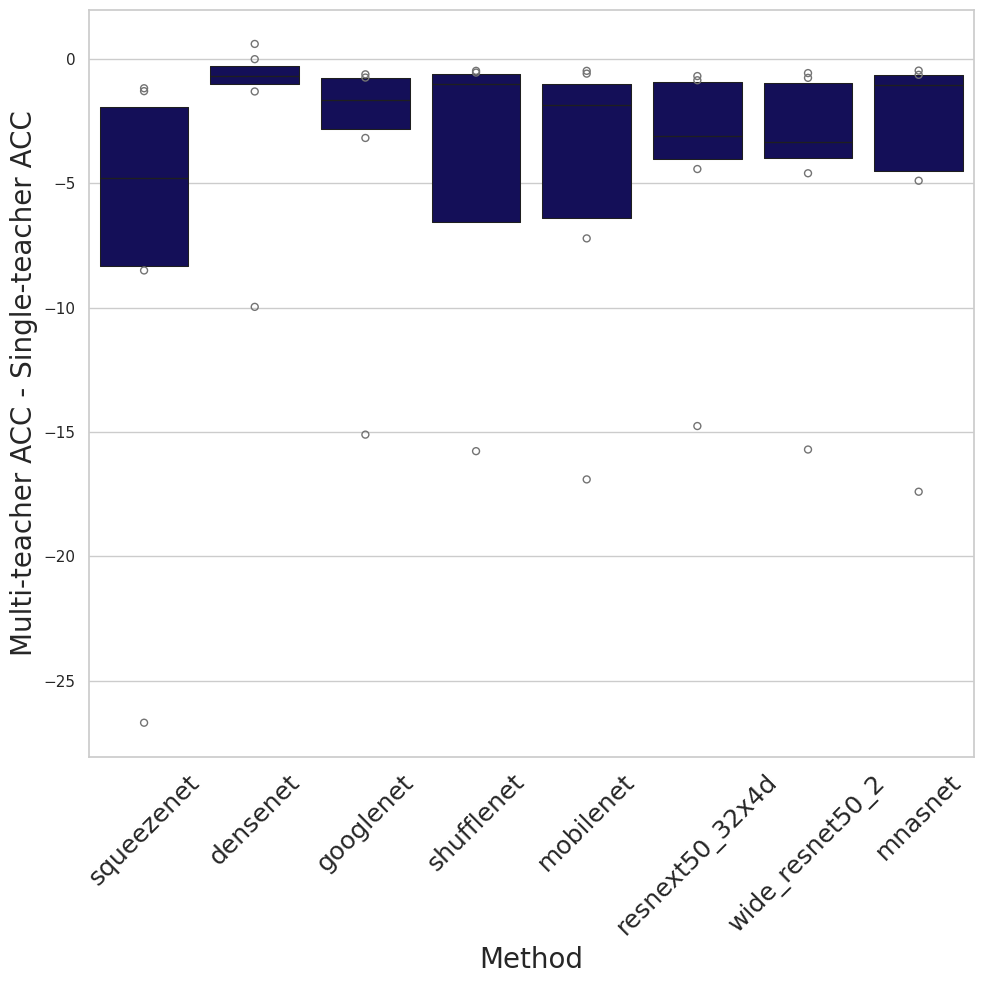

In [173]:
fig = plt.figure(figsize=(10, 10))
ax = sns.boxenplot(data=df_, x="Teacher", y="diffACC")
plt.ylabel("Multi-teacher ACC - Single-teacher ACC", fontsize=20)
plt.xlabel("Method", fontsize=20)
plt.xticks(rotation=45, fontsize=18) # Rotate x-axis labels by 45 degrees 
plt.tight_layout()
fig.savefig('Fig2.png', dpi=fig.dpi)